In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy.random import seed
seed(1)
mpl.rcParams['figure.figsize'] = (8, 6)

In [ ]:
! pip install apimoex
import apimoex as moex
import requests

tickers = [
'KMAZ', 'SVAV', 'GAZA', 'ZILL',      # тикеры автомобилестроительных комп.
'ALRS', 'POLY', 'PLZL', 'LNZL','BRZL','SELG',     # драг. металлы
'FIVE','DSKY','MVID','MGNT','APTK','OKEY','OZON',    # розница
'AKRN','PHOR','AGRO','AQUA','ABRD',     # сел. хоз.
'ETLN','PIKK','LSRG','MSTT',     # строительстов
'YNDX','MTSS','RTKM','MSRS','MRKV','MRKZ','MRKS','MRKP','MRKC','RASP','QIWI','VKCO','CIAN',  # технич.
'AFLT','UTAR','FLOT','FESH','NMTP','GLTR',        #   транспорт
'GMKN','MAGN','MTLR','NLMK','CHMF','TRMK','RUAL','AMEZ','VSMO',    # тяж. пром.
'CBOM','TCSG','VTBR','AFKS','BSPB','MOEX','SFIN','SBER','USBN',   # финансы
'ENPG','GAZP','IRAO','LKOH','ROSN','LPSB','NKNC','TATN','TGKA','TRNFP','HYDR','UPRO','RNFT', 'MSNG', 'NVTK', 'MRKU' # энергетика
]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stocks_df = pd.DataFrame(columns=tickers)
with requests.Session() as session:
  for tick in tickers:
    data = moex.get_board_history(session, tick, start='2022-04-01', end='2023-04-01', board='TQBR')
    if data == []:
        continue
    df = pd.DataFrame(data)
    df = df[['TRADEDATE','CLOSE']]
    df = df.rename(columns={'CLOSE': tick})
    stocks_df = stocks_df.combine_first(df)
stocks_df = stocks_df.set_index('TRADEDATE')
stocks_df

,ABRD,AFKS,AFLT,AGRO,AKRN,ALRS,AMEZ,APTK,AQUA,BRZL,...,TRMK,TRNFP,UPRO,USBN,UTAR,VKCO,VSMO,VTBR,YNDX,ZILL
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2022-04-01,183.5,13.890,38.80,1077.0,21190.0,94.02,22.540,12.164,539.5,1000.0,...,69.58,121350.0,1.782,0.0693,7.80,556.2,48300.0,0.02250,2325.0,3110.0
2022-04-04,183.5,14.105,40.90,1050.0,21012.0,94.70,24.005,12.180,532.5,1009.0,...,69.08,121900.0,1.798,0.0707,7.70,536.0,48300.0,0.02510,2285.0,3200.0
2022-04-05,173.0,13.451,37.76,1012.2,19410.0,92.76,24.975,11.950,501.5,960.0,...,64.66,117950.0,1.676,0.0657,7.35,502.2,53220.0,0.02308,2158.4,3185.0
2022-04-06,177.5,13.493,37.18,1023.0,21990.0,93.50,29.770,11.800,516.0,927.0,...,68.30,118000.0,1.634,0.0918,7.44,502.0,51000.0,0.02195,2070.8,3105.0
2022-04-07,183.5,13.622,37.58,1001.2,20910.0,92.80,26.790,11.688,539.5,940.0,...,67.42,115400.0,1.627,0.0831,7.43,492.0,52100.0,0.02281,2130.0,3080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,213.0,14.508,32.92,729.0,18914.0,65.44,95.505,12.888,616.5,1285.0,...,104.48,107150.0,1.897,0.0989,8.40,485.6,47040.0,0.01834,1919.6,3250.0
2023-03-28,218.0,14.391,32.36,724.8,18630.0,64.87,95.600,12.802,616.5,1283.0,...,103.00,106500.0,1.996,0.0982,8.33,483.2,46500.0,0.01830,1929.6,3205.0
2023-03-29,215.5,14.634,32.27,720.0,18852.0,64.56,97.090,12.892,613.0,1275.0,...,102.70,106400.0,1.958,0.0980,8.35,483.4,46580.0,0.01834,1919.6,3455.0


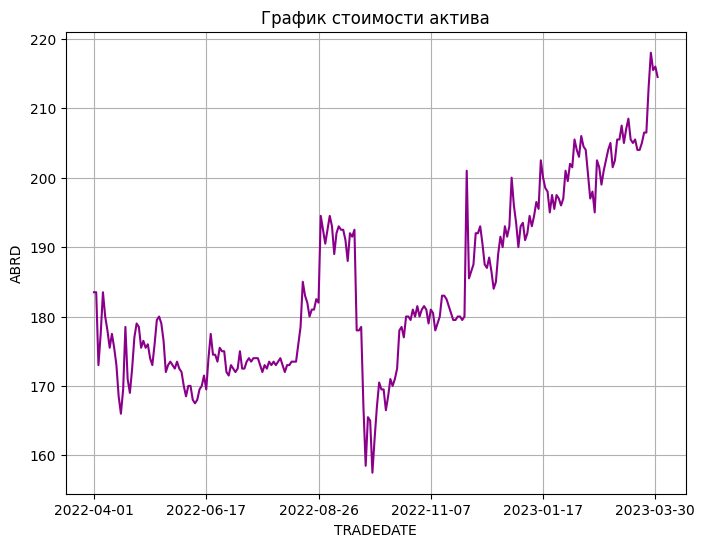

In [ ]:
stocks_df.iloc[:,0].plot.line(ylabel='ABRD', grid=True, color = 'darkmagenta', title='График стоимости актива');

Посчитаем ежедневную доходность (daily returns)

In [ ]:
returns_df = stocks_df.pct_change().dropna()
returns_df.head()

,ABRD,AFKS,AFLT,AGRO,AKRN,ALRS,AMEZ,APTK,AQUA,BRZL,...,TRMK,TRNFP,UPRO,USBN,UTAR,VKCO,VSMO,VTBR,YNDX,ZILL
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2022-04-04,0.000000,0.015479,0.054124,-0.025070,-0.008400,0.007233,0.064996,0.001315,-0.012975,0.009000,...,-0.007186,0.004532,0.008979,0.020202,-0.012821,-0.036318,0.000000,0.115556,-0.017204,0.028939
2022-04-05,-0.057221,-0.046367,-0.076773,-0.036000,-0.076242,-0.020486,0.040408,-0.018883,-0.058216,-0.048563,...,-0.063984,-0.032404,-0.067853,-0.070721,-0.045455,-0.063060,0.101863,-0.080478,-0.055405,-0.004687
2022-04-06,0.026012,0.003122,-0.015360,0.010670,0.132921,0.007978,0.191992,-0.012552,0.028913,-0.034375,...,0.056294,0.000424,-0.025060,0.397260,0.012245,-0.000398,-0.041714,-0.048960,-0.040586,-0.025118
2022-04-07,0.033803,0.009561,0.010758,-0.021310,-0.049113,-0.007487,-0.100101,-0.009492,0.045543,0.014024,...,-0.012884,-0.022034,-0.004284,-0.094771,-0.001344,-0.019920,0.021569,0.039180,0.028588,-0.008052
2022-04-08,-0.019074,-0.030025,-0.017030,0.004794,-0.035868,-0.110668,-0.027622,0.043634,-0.005561,-0.001064,...,0.023435,-0.007799,-0.008605,-0.089049,-0.013459,0.011789,0.044146,-0.019728,-0.007042,-0.048701


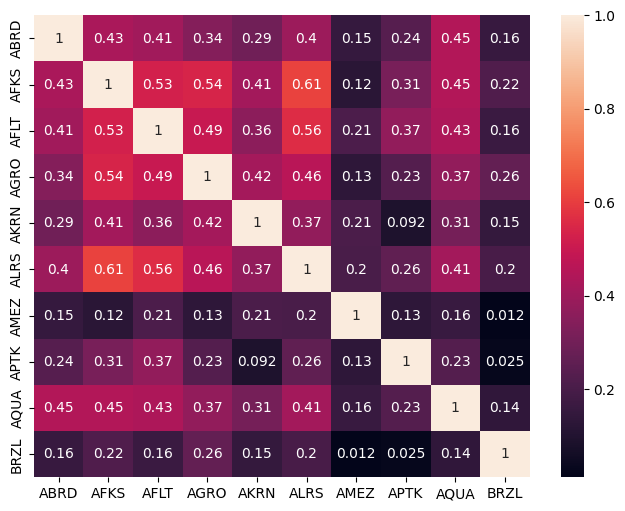

In [ ]:
sns.heatmap(returns_df.iloc[:,0:10].corr(), annot=True);

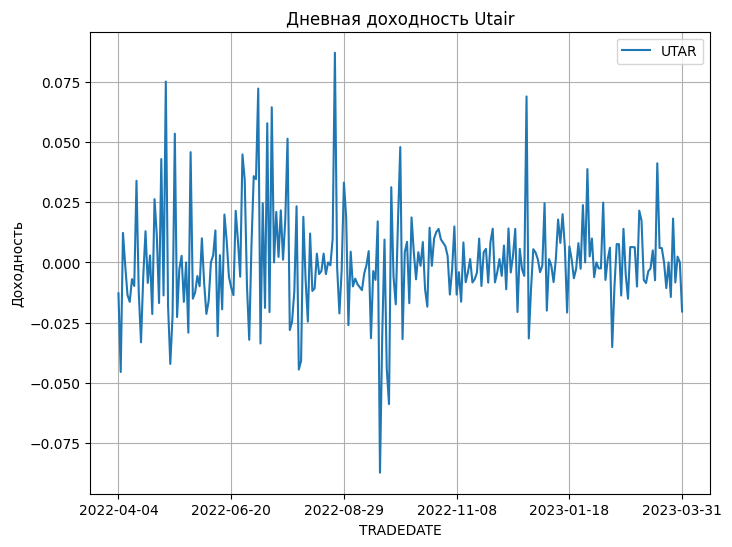

In [ ]:
returns_df.loc[:,['UTAR']].plot.line(ylabel='Доходность', grid=True, title='Дневная доходность Utair');

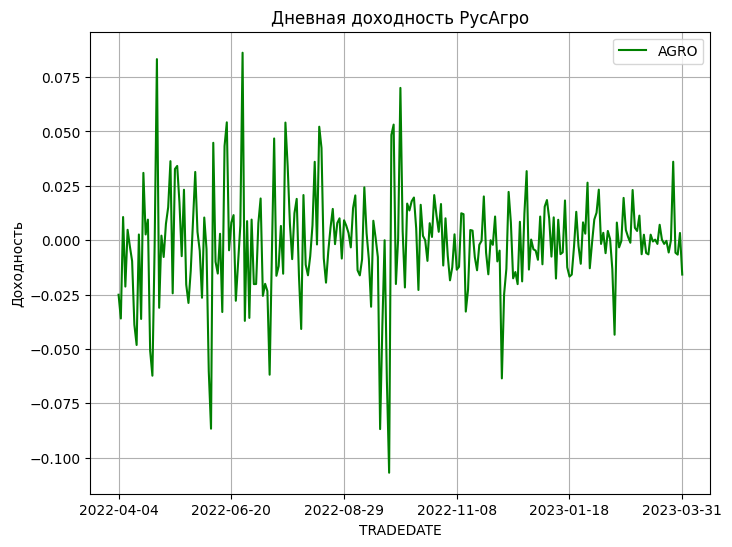

In [ ]:
returns_df.loc[:,['AGRO']].plot.line(ylabel='Доходность', grid=True, color='g', title='Дневная доходность РусАгро');

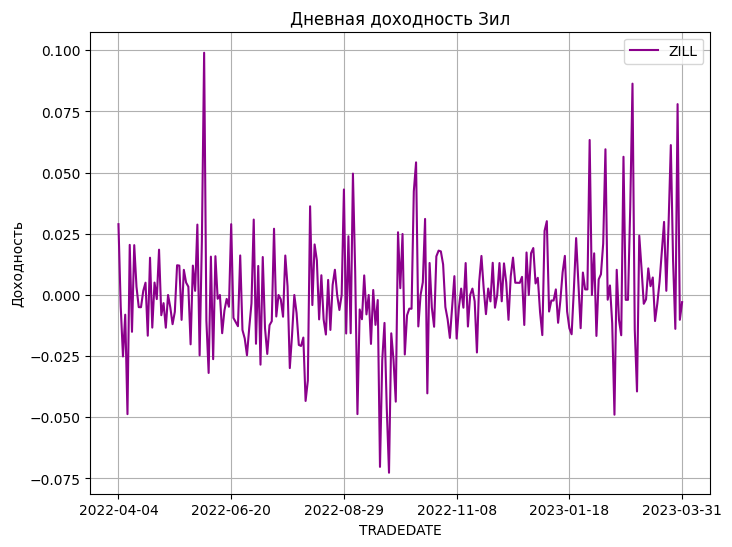

In [ ]:
returns_df.loc[:,['ZILL']].plot.line(ylabel='Доходность', grid=True, color = 'darkmagenta', title='Дневная доходность Зил');

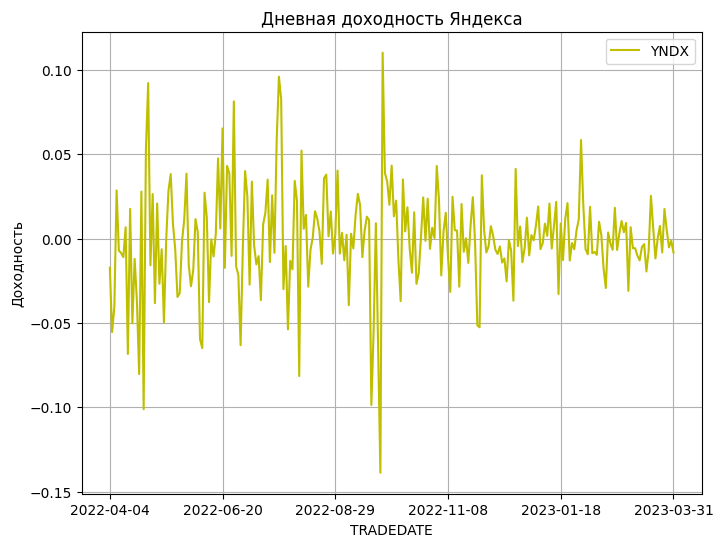

In [ ]:
returns_df.loc[:,['YNDX']].plot.line(ylabel='Доходность', grid=True, color = 'y', title='Дневная доходность Яндекса');

In [ ]:
n = len(returns_df)
train_returns_df = returns_df[0:int(n*0.7)]
val_returns_df = returns_df[int(n*0.7):int(n*0.9)]
test_returns_df = returns_df[int(n*0.9):]

In [ ]:
train_returns_df.shape, val_returns_df.shape, test_returns_df.shape

((175, 79), (50, 79), (26, 79))

### Функция построения окон данных

In [ ]:
class WindowCreate():
  # Обработка основных параметров
  def __init__(self, size, train=train_returns_df, val=val_returns_df, test=test_returns_df):

    # сохранение данных
    self.train = train
    self.val = val
    self.test = test
    self.stock_index = {stock: i for i, stock in enumerate(train.columns)}

    # сохранение параметров окна
    self.size = size
    self.labels_size = 1
    self.win_size = size + self.labels_size

    # индексирование окон данных
    self.data_sl = slice(0, size)
    self.in_indexes = np.arange(self.win_size)[self.data_sl]
    self.label_sl = slice(self.labels_size, None)
    self.label_indexes = np.arange(self.win_size)[self.label_sl]

  # преобразование последовательных данных в окно входных данных и окно меток
  def set_win(self, data):
    in_data = data[:, self.data_sl, :]
    label = data[:, self.label_sl, :]
    in_data.set_shape([None, self.size, None])
    label.set_shape([None, self.size, None])
    return in_data, label

  # создание наборов данных скользящих окон
  def dataset(self, input):
    input = np.array(input)
    dataset = tf.keras.utils.timeseries_dataset_from_array(
        data=input,
        targets=None,
        sequence_length=self.win_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=8)
    dataset = dataset.map(self.set_win)
    return dataset

  # визуализация предсказаний модели
  def plot(self, model=None, ticker=tickers[0]):
    ticker_index = self.stock_index[ticker]
    for a in range(3):
      image = self.example[a]
      in_data, labels = image[0], image[1]
      plt.subplot(3, 1, a+1)
      if a==0:
        plt.ylabel(ticker+' [обуч. набор]')
      elif a==1:
        plt.ylabel(ticker+' [валид. набор]')
      elif a==2:
        plt.ylabel(ticker+' [тестовый набор]')
      plt.plot(self.in_indexes, in_data[0, :, ticker_index],
              label='Входные данные', marker='.', color = 'darkmagenta', zorder=-10)

      plt.scatter(self.label_indexes, labels[0, :, ticker_index],
                  edgecolors='navy', label='Метки', c='slateblue', s=50)
      if model is not None:
        pred = model(in_data)
        plt.scatter(self.label_indexes, pred[0, :, ticker_index],
                    marker='X', edgecolors='darkred', label='Прогноз',
                    c='crimson', s=50)

      if a == 0:
        plt.legend()
      plt.xticks(np.arange(0, self.size+1, step=1))
    plt.xlabel('День')

In [ ]:
@property
def train_ds(self):
  return self.dataset(self.train)

@property
def val_ds(self):
  return self.dataset(self.val)

@property
def test_ds(self):
  return self.dataset(self.test)

@property
def example(self):
  train = next(iter(self.train_ds))
  val = next(iter(self.val_ds))
  test = next(iter(self.test_ds))
  result = [[tf.reshape(train[0][-1], [1, self.size, len(self.stock_index)])]+[tf.reshape(train[1][-1], [1, self.size,len(self.stock_index)])]] \
                                                                  + [[tf.reshape(val[0][-1], [1, self.size, len(self.stock_index)])] \
                                                                  + [tf.reshape(val[1][-1], [1, self.size, len(self.stock_index)])]] \
                                                                  + [[test[0]]+[test[1]]]
  return result

WindowCreate.train_ds = train_ds
WindowCreate.val_ds = val_ds
WindowCreate.test_ds = test_ds
WindowCreate.example = example

In [ ]:
window1 = WindowCreate(size=5)
window2 = WindowCreate(size=10)
window3 = WindowCreate(size=15)
window4 = WindowCreate(size=20)

In [ ]:
# def compile_and_fit(model, data):
#   model.compile(loss=tf.losses.MeanSquaredError(),
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#   callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=2,
#                                                     mode='auto')
#   history = model.fit(data.train_ds, epochs=10,
#                       validation_data=data.val_ds,
#                       callbacks=[callback])
#   return history

In [ ]:
def compile_and_fit(model, data):
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='auto')
  history = model.fit(data.train_ds, epochs=10,
                      validation_data=data.val_ds,
                      callbacks=[callback])
  return history

In [ ]:
model1 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history1 = compile_and_fit(model1, window1)

perf_v = {}
perf = {}
perf_v['5 дней'] = model1.evaluate(window1.val_ds)
perf['5 дней'] = model1.evaluate(window1.test_ds, verbose=0)

Epoch 1/10
22/22 [==============================] - 3s 34ms/step - loss: 9.2857e-04 - mean_absolute_error: 0.0196 - val_loss: 6.5097e-04 - val_mean_absolute_error: 0.0137
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 9.2008e-04 - mean_absolute_error: 0.0196 - val_loss: 6.5362e-04 - val_mean_absolute_error: 0.0137
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 6.5117e-04 - mean_absolute_error: 0.0136


In [ ]:
model2 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history2 = compile_and_fit(model2, window2)

perf_v['10 дней'] = model2.evaluate(window2.val_ds)
perf['10 дней'] = model2.evaluate(window2.test_ds, verbose=0)

Epoch 1/10
21/21 [==============================] - 4s 53ms/step - loss: 9.4554e-04 - mean_absolute_error: 0.0200 - val_loss: 6.5431e-04 - val_mean_absolute_error: 0.0134
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 9.2702e-04 - mean_absolute_error: 0.0197 - val_loss: 6.4931e-04 - val_mean_absolute_error: 0.0133
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 9.1901e-04 - mean_absolute_error: 0.0196 - val_loss: 6.4647e-04 - val_mean_absolute_error: 0.0133
Epoch 4/10
21/21 [==============================] - 0s 8ms/step - loss: 9.1380e-04 - mean_absolute_error: 0.0195 - val_loss: 6.4587e-04 - val_mean_absolute_error: 0.0133
Epoch 5/10
21/21 [==============================] - 0s 10ms/step - loss: 9.0747e-04 - mean_absolute_error: 0.0194 - val_loss: 6.4719e-04 - val_mean_absolute_error: 0.0133
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 6.5003e-04 - mean_absolute_error: 0.0133


In [ ]:
model3 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history3 = compile_and_fit(model3, window3)

perf_v['15 дней'] = model3.evaluate(window3.val_ds)
perf['15 дней'] = model3.evaluate(window3.test_ds, verbose=0)

Epoch 1/10
20/20 [==============================] - 5s 40ms/step - loss: 9.4230e-04 - mean_absolute_error: 0.0199 - val_loss: 5.8931e-04 - val_mean_absolute_error: 0.0129
Epoch 2/10
20/20 [==============================] - 0s 12ms/step - loss: 9.3259e-04 - mean_absolute_error: 0.0198 - val_loss: 5.8760e-04 - val_mean_absolute_error: 0.0129
Epoch 3/10
20/20 [==============================] - 0s 12ms/step - loss: 9.2589e-04 - mean_absolute_error: 0.0197 - val_loss: 5.9001e-04 - val_mean_absolute_error: 0.0129
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 5.8765e-04 - mean_absolute_error: 0.0129


In [ ]:
model4 = tf.keras.models.Sequential([
    LSTM(8, return_sequences=True),
    Dense(units=stocks_df.shape[1])
])

history4 = compile_and_fit(model4, window4)

perf_v['20 дней'] = model4.evaluate(window4.val_ds)
perf['20 дней'] = model4.evaluate(window4.test_ds, verbose=0)

Epoch 1/10
20/20 [==============================] - 3s 42ms/step - loss: 9.4413e-04 - mean_absolute_error: 0.0200 - val_loss: 5.8258e-04 - val_mean_absolute_error: 0.0131
Epoch 2/10
20/20 [==============================] - 0s 12ms/step - loss: 9.3220e-04 - mean_absolute_error: 0.0198 - val_loss: 5.8031e-04 - val_mean_absolute_error: 0.0131
Epoch 3/10
20/20 [==============================] - 0s 11ms/step - loss: 9.2436e-04 - mean_absolute_error: 0.0198 - val_loss: 5.7844e-04 - val_mean_absolute_error: 0.0130
Epoch 4/10
20/20 [==============================] - 0s 14ms/step - loss: 9.1774e-04 - mean_absolute_error: 0.0196 - val_loss: 5.7599e-04 - val_mean_absolute_error: 0.0129
Epoch 5/10
20/20 [==============================] - 0s 14ms/step - loss: 9.1097e-04 - mean_absolute_error: 0.0196 - val_loss: 5.7785e-04 - val_mean_absolute_error: 0.0130
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 5.7647e-04 - mean_absolute_error: 0.0130


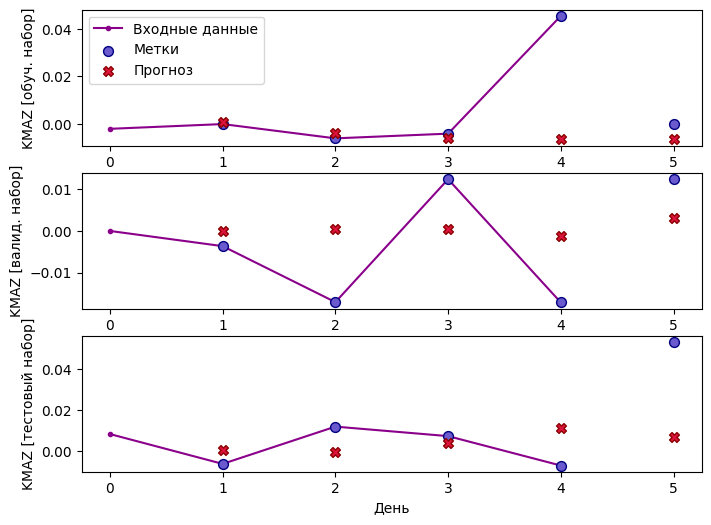

In [ ]:
window1.plot(model1)

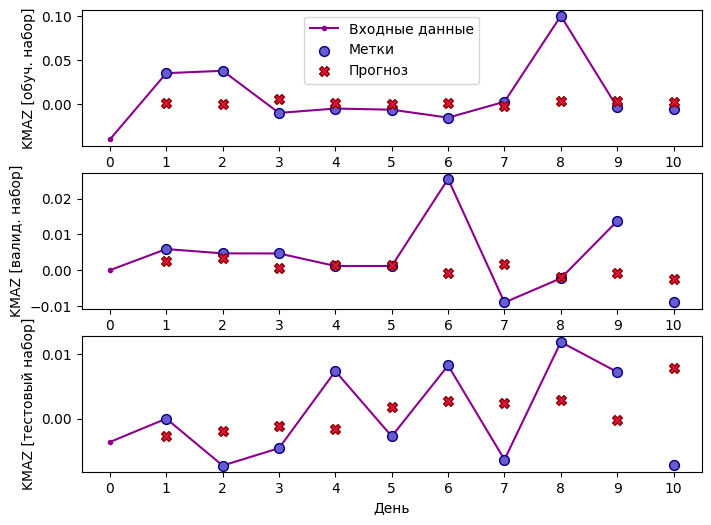

In [ ]:
window2.plot(model2)

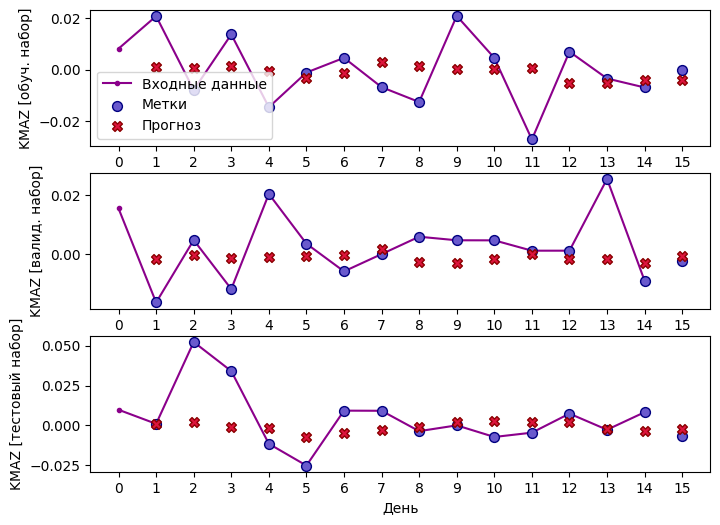

In [ ]:
window3.plot(model3)

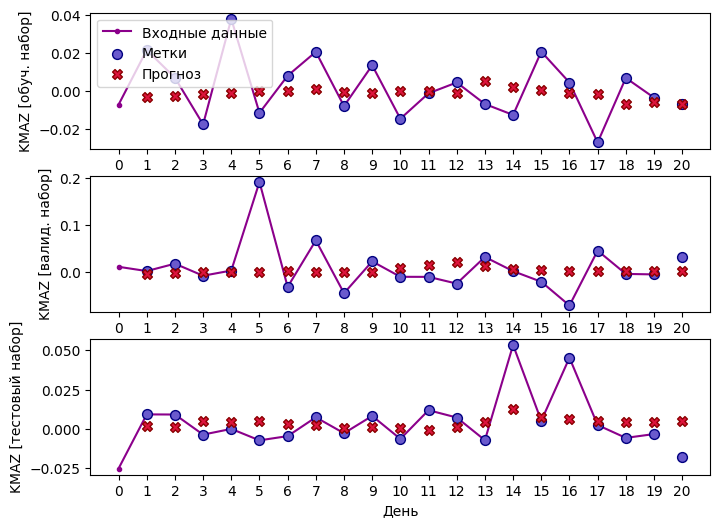

In [ ]:
window4.plot(model4)

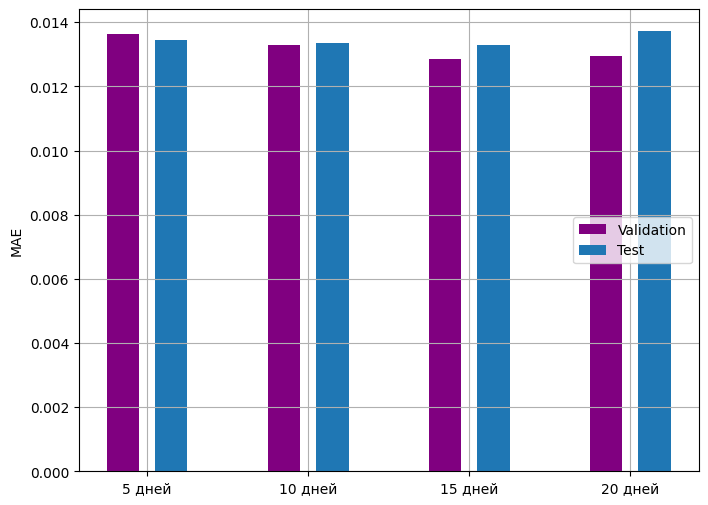

In [ ]:
x = np.arange(len(perf))
width = 0.2
metric = model1.metrics_names.index('mean_absolute_error')
mae_valid = [value[metric] for value in perf_v.values()]
mae_test = [value[metric] for value in perf.values()]

plt.ylabel('MAE')
plt.grid()
plt.bar(x - 0.15, mae_valid, width, label='Validation', color = 'purple')
plt.bar(x + 0.15, mae_test, width, label='Test')
plt.xticks(ticks=x, labels=perf.keys())
_ = plt.legend(loc='center right')

In [ ]:
last_month_returns = next(iter(window3.test_ds))[-1]
return_prediction = model3(last_month_returns)[0][-1]
R = return_prediction.numpy()

In [ ]:
from tabulate import tabulate

num_features = returns_df.shape[1]
arg_sort = sorted(range(len(R)), key=lambda i: R[i])
returns_s = [R[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
returns_stocks_ = []
for i in range(num_features):
  returns_stocks_.append([stock_name[i], returns_s[i]])
print(tabulate(returns_stocks_))

-----  ------------
CIAN   -0.0180559
AKRN   -0.0165637
PLZL   -0.0156063
NLMK   -0.0139678
IRAO   -0.0119275
KMAZ   -0.0113031
RUAL   -0.0106759
DSKY   -0.0104117
TRNFP  -0.00939419
RTKM   -0.00871975
ETLN   -0.0086794
AMEZ   -0.00785677
MRKC   -0.0074724
ROSN   -0.00714891
ABRD   -0.00713233
NVTK   -0.00591634
FLOT   -0.00571051
AFLT   -0.00554582
GMKN   -0.00520854
YNDX   -0.00477883
APTK   -0.00475564
MTSS   -0.00439943
MGNT   -0.00420388
GAZA   -0.00401701
MOEX   -0.00363539
MVID   -0.00355753
AFKS   -0.00313128
MSTT   -0.00271654
MRKP   -0.00248065
LKOH   -0.00204926
CHMF   -0.00150046
ZILL   -0.00123746
BRZL   -0.000321478
FIVE   -0.000236851
MSNG   -0.000141702
GLTR    0.000297569
LNZL    0.000420035
VTBR    0.000483976
OZON    0.000673902
ENPG    0.00120604
UTAR    0.00176859
SELG    0.00209647
SFIN    0.0021634
LPSB    0.00250099
POLY    0.0025066
CBOM    0.00255694
HYDR    0.00376101
VSMO    0.00387881
RNFT    0.00402896
ALRS    0.00407362
MSRS    0.0041271
NKNC    0.0043759

Матрица ковариаций доходностей активов

In [ ]:
# матрица ковариаций доходностей активов
V = np.cov(returns_df.T)
V_inv = np.linalg.inv(V)

# вектор столбец I, состоящий из n единиц (n = кол-во ценных бумаг в портфеле)
I = np.ones(stocks_df.shape[1])
I_T = I.T

In [ ]:
sigma = 0.03
alpha = I@V_inv@I_T
beta = I@V_inv@R
gamma = R.T@V_inv@R
delta = alpha*gamma - beta*beta
mu0 = beta/alpha + math.sqrt((sigma*sigma - 1/alpha)*delta/alpha)

# итоговые веса
W = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*R)

In [ ]:
from tabulate import tabulate
arg_sort = sorted(range(len(W)), key=lambda i: W[i])
weight = [W[i] for i in arg_sort]
stock_name = [returns_df.columns[i] for i in arg_sort]
weights_ = []
for i in range(num_features):
  weights_.append([stock_name[i], weight[i]])
print(tabulate(weights_))

-----  -----------
RTKM   -0.789478
ABRD   -0.647005
NLMK   -0.643884
MRKC   -0.601809
AKRN   -0.506257
NVTK   -0.503198
RUAL   -0.460441
CIAN   -0.388606
FLOT   -0.367892
AFKS   -0.36227
KMAZ   -0.345625
PLZL   -0.336231
MVID   -0.27238
GAZP   -0.220511
MRKS   -0.196797
ETLN   -0.194959
MGNT   -0.193922
IRAO   -0.191929
ROSN   -0.16943
TRNFP  -0.147807
MRKZ   -0.131413
LKOH   -0.129283
AFLT   -0.124028
OZON   -0.123152
RNFT   -0.122242
MTLR   -0.120234
APTK   -0.115601
DSKY   -0.111612
GLTR   -0.0899033
AMEZ   -0.0887431
FIVE   -0.0806349
ZILL   -0.0646664
VKCO   -0.0502743
MRKP   -0.0044794
MTSS    0.00189496
MSTT    0.00620131
USBN    0.0257225
NMTP    0.0497396
LNZL    0.0584934
LPSB    0.0652305
SELG    0.0712027
GAZA    0.0794541
BRZL    0.0818528
MSNG    0.0891893
MOEX    0.0968623
QIWI    0.103041
UTAR    0.108842
LSRG    0.110783
NKNC    0.111338
BSPB    0.147123
ALRS    0.150401
TCSG    0.15626
YNDX    0.15993
OKEY    0.163382
FESH    0.182733
VTBR    0.19504
VSMO    0.19858


In [ ]:
portfolio_return = R@W
portfolio_return

0.12689049230599544

In [ ]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(5000):
    weights = np.random.random(num_features) * (1 + 1) - 1
    weights = weights/sum(weights)
    returns = weights@R
    vol = weights.T@V@weights
    if vol < 1:
      portfolio_returns.append(returns)
      portfolio_volatilities.append(vol)

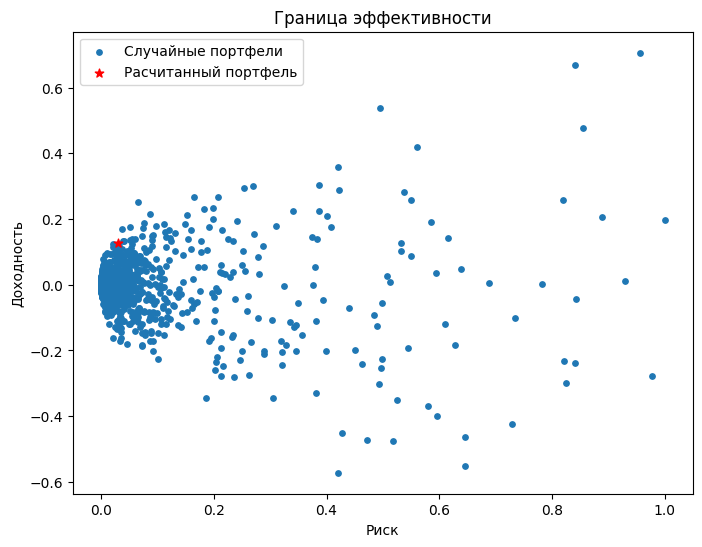

In [ ]:
plt.scatter(portfolio_volatilities, portfolio_returns, s = 15, label='Случайные портфели')
plt.scatter(sigma, portfolio_return, color='r', s = 40, marker='*', label='Расчитанный портфель')
plt.legend()
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Граница эффективности');